# Answers to last part of Exercise 3

## 1. Plots from the best fit

We run the commands, 
```
combineCards.py signalregion=signalregion_mbjj.txt controlregion=controlregion_mjjj.txt > combined.txt

combine combined.txt -M FitDiagnostics --skipB -n Combined --cminDefaultMinimizerStrategy 0 --saveShapes --saveWithUncert 
```

And we create the plots - I am using the `pyROOT` version. 

In [2]:
import ROOT

# Signal region 
file   = ROOT.TFile.Open("fitDiagnosticsCombined.root")

folder = file.Get("shapes_fit_s/signalregion")
data  = folder.Get("data")
print(data.GetN())
total = folder.Get("total"); total.SetFillColor(ROOT.kGray); total.SetFillStyle(1001)

ttbar = folder.Get("ttbar") ; ttbar.SetFillColor(ROOT.kOrange) 
wjets = folder.Get("wjets") ; wjets.SetFillColor(ROOT.kRed+1)
single_top_tW = folder.Get("single_top_tW") ; single_top_tW.SetFillColor(ROOT.kBlue)
single_atop_t_chan = folder.Get("single_atop_t_chan"); single_atop_t_chan.SetFillColor(ROOT.kBlue-3)
single_top_t_chan  = folder.Get("single_top_t_chan"); single_top_t_chan.SetFillColor(ROOT.kBlue-9)

# create legend and stack and fill them
legend = ROOT.TLegend(0.6,0.6,0.89,0.89)
legend.AddEntry(data,"data","pe")

stk = ROOT.THStack("stack",";;Events")
stk.Add(single_top_t_chan); legend.AddEntry(single_top_t_chan,"single_top_t_chan","F")
stk.Add(single_atop_t_chan); legend.AddEntry(single_atop_t_chan,"single_atop_t_chan","F")
stk.Add(single_top_tW); legend.AddEntry(single_top_tW,"single_top_tW","F")
stk.Add(wjets); legend.AddEntry(wjets,"wjets","F")
stk.Add(ttbar); legend.AddEntry(ttbar,"ttbar","F")

# Control region 
folder2 = file.Get("shapes_fit_s/controlregion")
data2  = folder2.Get("data")
print(data2.GetN())
total2 = folder2.Get("total"); total2.SetFillColor(ROOT.kGray)

ttbar2 = folder2.Get("ttbar") ; ttbar2.SetFillColor(ROOT.kOrange) ; ttbar2.SetFillStyle(1001)
wjets2 = folder2.Get("wjets") ; wjets2.SetFillColor(ROOT.kRed+1)
single_top_tW2 = folder2.Get("single_top_tW") ; single_top_tW2.SetFillColor(ROOT.kBlue)
single_atop_t_chan2 = folder2.Get("single_atop_t_chan"); single_atop_t_chan2.SetFillColor(ROOT.kBlue-3)
single_top_t_chan2  = folder2.Get("single_top_t_chan"); single_top_t_chan2.SetFillColor(ROOT.kBlue-9)

# create legend and stack and fill them
legend2 = ROOT.TLegend(0.6,0.6,0.89,0.89)
legend2.AddEntry(data2,"data","pe")

stk2 = ROOT.THStack("stack",";;Events")
stk2.Add(single_top_t_chan2); legend2.AddEntry(single_top_t_chan2,"single_top_t_chan","F")
stk2.Add(single_atop_t_chan2); legend2.AddEntry(single_atop_t_chan2,"single_atop_t_chan","F")
stk2.Add(single_top_tW2); legend2.AddEntry(single_top_tW2,"single_top_tW","F")
stk2.Add(wjets2); legend2.AddEntry(wjets,"wjets","F")
stk2.Add(ttbar2); legend2.AddEntry(ttbar,"ttbar","F")

#data.Draw("ApE")
stk2.SetMaximum(30000)

20
20


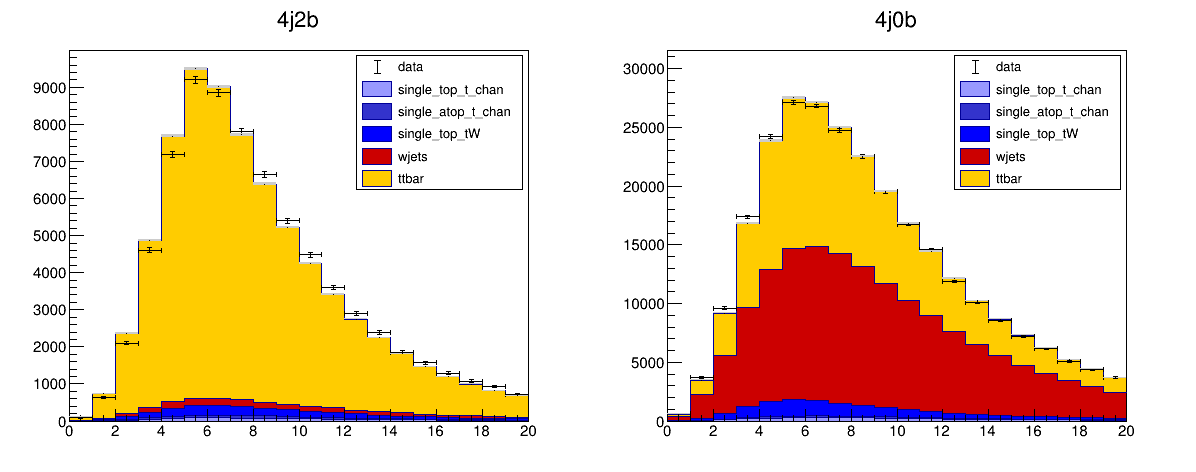

In [3]:
canvas = ROOT.TCanvas("c","c",1200,500)
canvas.Divide(2)

canvas.cd(1)
stk.SetTitle("4j2b")
stk.Draw("hist")
data.Draw("pE")
total.Draw("E2same")
legend.Draw()

canvas.cd(2)
stk2.SetTitle("4j0b")
stk2.Draw("hist")
data2.Draw("pE")
total2.Draw("E2same")
legend2.Draw()

canvas.Draw()

## 2. We can print the best fit results using the code provided. 

Here I use the `pyROOT` version. 

In [4]:
import ROOT
file   = ROOT.TFile.Open("fitDiagnosticsCombined.root")
fit_res = file.Get("fit_s")
fit_res.Print()


  RooFitResult: minimized FCN value: -0.00020326, estimated distance to minimum: 5.34275e-06
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                  btag    2.1634e+00 +/-  8.54e-01
                 ideff    4.6681e-01 +/-  1.02e+00
                   jes    7.7198e-01 +/-  6.09e-02
                  lumi   -3.7650e-01 +/-  1.01e-02
  prop_bincontrolregion_bin0    7.9891e-01 +/-  8.83e-01
  prop_bincontrolregion_bin1    2.1593e+00 +/-  9.00e-01
  prop_bincontrolregion_bin10   -1.3274e-01 +/-  9.10e-01
  prop_bincontrolregion_bin11    5.6041e-01 +/-  9.08e-01
  prop_bincontrolregion_bin12   -1.1857e+00 +/-  9.12e-01
  prop_bincontrolregion_bin13   -4.7468e-01 +/-  9.10e-01
  prop_bincontrolregion_bin14   -2.6136e-01 +/-  9.08e-01
  prop_bincontrolregion_bin15   -7.2318e-01 +/-  9.09e-01
  prop_bincontro

## 3. The $\chi^{2}$ 

It is obtained first running the `GoodnessOfFit` method, 
```sh
combine combined.txt -M GoodnessOfFit --algo=saturated
```

In [5]:
import ROOT 
ROOT.TMath.Prob(335.387,18)

2.4173644837191786e-60

## 4. Profiled likelihood scan 

We can run a scan of the profiled likelihood using `combine` with, 
```sh
combine combined.txt -M MultiDimFit --algo grid --points 50 --setParameterRanges r=0.7,1 -n Combined
```
and plot using similar code to before. 

Text(0, 0.5, '$q(r)$')

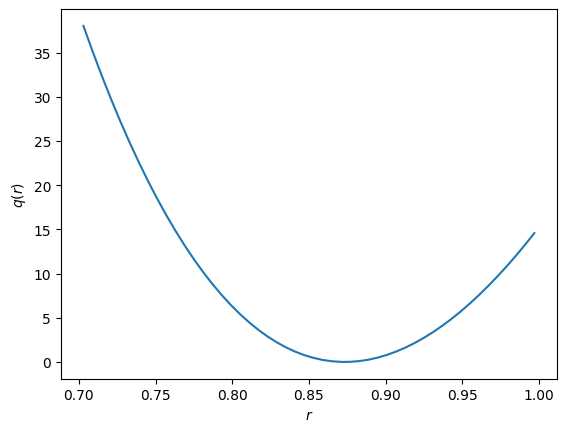

In [9]:
import matplotlib.pyplot as plt

from root2py import *
import ROOT
fscan = ROOT.TFile("higgsCombineCombined.MultiDimFit.mH120.root")
tree  = fscan.Get("limit")
x,y = get2DeltaNLLScan(tree)
plt.plot(x,y) 
plt.xlabel("$r$")
plt.ylabel("$q(r)$")